In [2]:
# PY1010 Prosjektoppgave v7 
# ## Alexander Nygaren-Zervas, ANZ
# ### 2025 03 27

# Del a) Lag et program som leser inn følgende Excel fil og som lagrer dataen i de ulike kolonnene i separate arrays

import pandas as pd

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")  # Leser inn Excel-filen og lagrer innholdet som en DataFrame

# Excel filen må ligge i samme mappe som notebooken for at den skal kunne gjenkjennes

# Dataen fra de ulike kolonnene skal hentes ut og lagres i separate arrays
u_dag = df.iloc[:, 0].to_numpy()     # Første kolonne er Ukedag
kl_slett = df.iloc[:, 1].to_numpy()  # Andre kolonne er Klokkeslett
varighet = df.iloc[:, 2].to_numpy()  # Tredje kolonne er Varighet
score = df.iloc[:, 3].to_numpy()     # Fjerde kolonne er Tilfredshet

# df.iloc brukes for å hente ut data basert på rad- og kolonneposisjoner i en DataFrame. 
# [:, 0] betyr at vi henter alle rader fra første kolonne, [:, 1] fra andre, osv.
# to_numpy() konverterer kolonnen til en NumPy-array.

# Skriv ut resultatene
print("Ukedag:", u_dag)
print("Klokkeslett:", kl_slett)
print("Varighet:", varighet)
print("Tilfredshet:", score)

Ukedag: ['Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Onsdag' 'Onsdag'
 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag

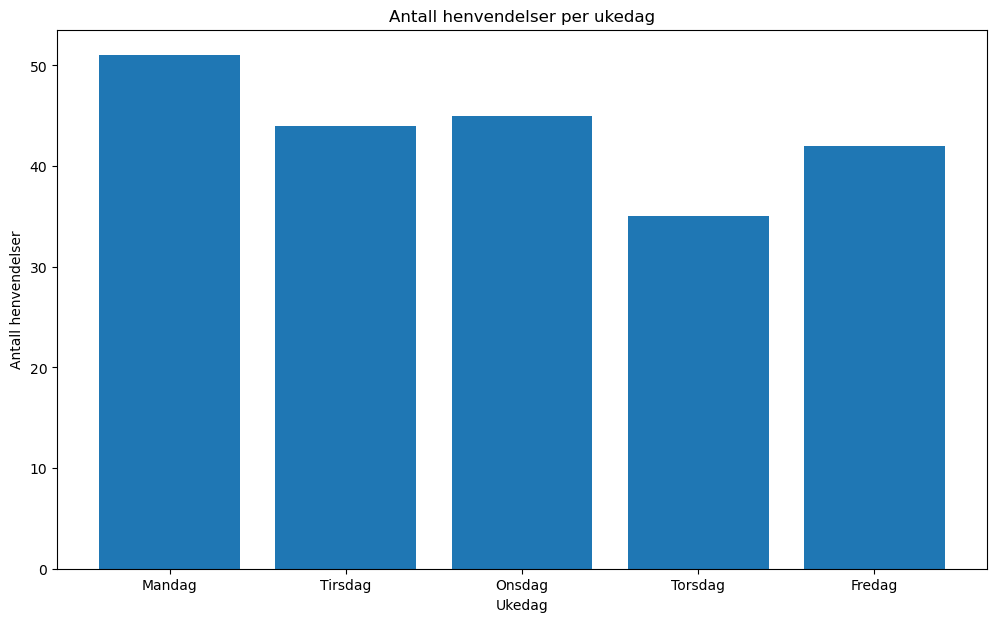

In [18]:
# Del b) Lag et program som finner antall henvendelser for hver av de 5 ukedagene og visualiserer de i form av et søylediagram  

import pandas as pd
import matplotlib.pyplot as plt

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")  

# Koden over blir brukt i hver del av oppgaven fremover.
# Siden jeg forklarte hva den gjør tidligere,
# så kommer jeg ikke til å gjøre det flere ganger.

# Hent ut ukedager som liste
u_dag = df["Ukedag"].tolist()  # Henter 'Ukedag' kolonnen som en liste

# Tell antall henvendelser per ukedag
henvendelser_per_dag = pd.Series(u_dag).value_counts()

# pd.Series(u_dag) skaper en ny data array fra en liste (i dette tilfellet u_dag)
# .value_counts() teller antall forekomster av hver unik verdi i serien

# Definer ønsket rekkefølge for ukedagene
ukedager = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]

# Filtrer ut eventuelle uønskede verdier og sorter etter ukedagene
henvendelser_per_dag = henvendelser_per_dag.reindex(ukedager) # Reindekserer ukedagene i ønsket rekkefølge

# Visualiser med et søylediagram
plt.figure(figsize=(12, 7))
plt.bar(henvendelser_per_dag.index, henvendelser_per_dag.values)
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.title("Antall henvendelser per ukedag")
plt.show() # Viser diagrammet på skjermen

In [4]:
# Del c) Lag et program som finner minste og lengste samtaletid i uke 24

import pandas as pd 

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# tid_til_sekunder funksjonen tar inn en tid som en tekststreng i formatet 'hh:mm:ss',
# og konverterer den til totalt antall sekunder.
# Først splittes teksten opp i tre deler (timer, minutter, sekunder),
# før den blir gjort om til heltall.
# Til slutt regnes totalen ut og returneres.
def tid_til_sekunder(tid):
    h, m, s = map(int, tid.split(":"))
    return h * 3600 + m * 60 + s

# Henter og konverterer varighet til sekunder
varighet = df["Varighet"].tolist()  # Henter 'Varighet' kolonnen som en liste
varighet_sek = [tid_til_sekunder(v) for v in varighet]  # Konverterer hver Varighet-verdi i listen til sekunder ved hjelp av tid_til_sekunder()

# Finn minste og største verdi
min_tid = min(varighet_sek)  # Finner korteste samtaletid i sekunder
max_tid = max(varighet_sek)  # Finner lengste samtaletid i sekunder


# Denne funksjonen tar inn et tall som representerer et antall sekunder,
# og konverterer det tilbake til en tid i formatet 'hh:mm:ss'.
# Den bruker funksjonen divmod() til å:
# - Først finne antall hele timer og resten etter at timer er trukket fra
# - Så finne antall hele minutter og resterende sekunder
# Til slutt returneres en formatert tekststreng hvor tidens komponenter
# (timer, minutter, sekunder) vises med to sifre hver
def sekunder_til_tid(sek):
    h, rem = divmod(sek, 3600)
    m, s = divmod(rem, 60)
    return f"{h:02}:{m:02}:{s:02}"

# Skriv ut resultat
print(f"Minste samtaletid: {sekunder_til_tid(min_tid)}")
print(f"Lengste samtaletid: {sekunder_til_tid(max_tid)}")

Minste samtaletid: 00:00:59
Lengste samtaletid: 00:11:28


In [22]:
# Del d) Lag et program som regner ut gjennomsnittlig samtaletid i uke 24

import pandas as pd 

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Funksjoner for konvertering
def tid_til_sekunder(tid):  # Samme funksjon som ble brukt i del c over
    h, m, s = map(int, tid.split(":"))
    return h * 3600 + m * 60 + s

def sekunder_til_tid(sek):  # Denne funksjonen ble også brukt i del c
    h, rem = divmod(sek, 3600)
    m, s = divmod(rem, 60)
    return f"{h:02}:{m:02}:{s:02}"

# Henter og konverterer varighet til sekunder
varighet = df["Varighet"].tolist()  # Henter 'Varighet' kolonnen som en liste
varighet_sek = [tid_til_sekunder(v) for v in varighet]  # Konverterer hver Varighet-verdi i listen til sekunder ved hjelp av tid_til_sekunder()

# Denne linjen beregner gjennomsnittlig samtaletid i uke 24.
# sum(varighet_sek) summerer alle samtaletidene i sekunder.
# len(varighet_sek) teller hvor mange samtaler som er loggført.
# Ved å dele summen på antallet får vi gjennomsnittet i sekunder.
# int(...) brukes for å runde ned til nærmeste heltall (fjerner desimaler).
# sekunder_til_tid(...) konverterer dette tallet tilbake til 'hh:mm:ss'-format.
# Resultatet lagres i variabelen gjennomsnitt_tid som en formateringsklar streng.
gjennomsnitt_tid = sekunder_til_tid(int(sum(varighet_sek) / len(varighet_sek)))  # Beregner gjennomsnittlig samtaletid
print(f"Gjennomsnittlig samtaletid: {gjennomsnitt_tid}")

Gjennomsnittlig samtaletid: 00:06:40


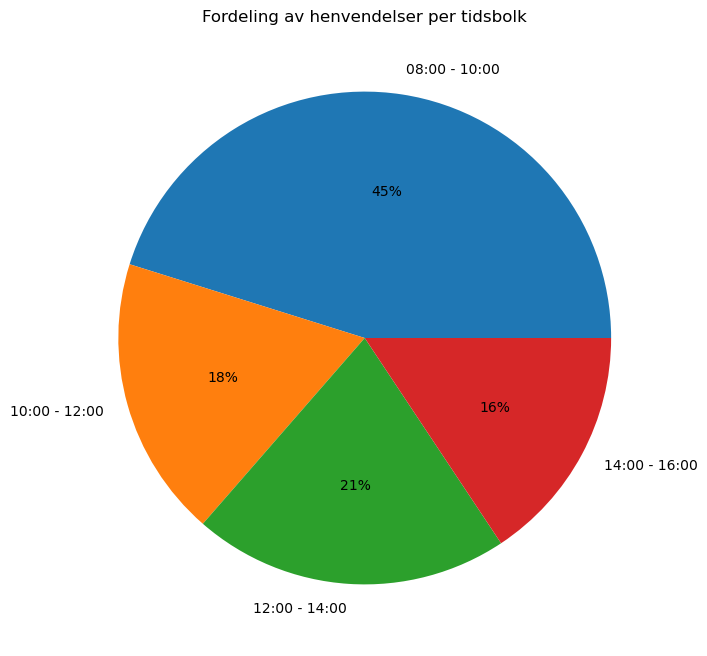

In [6]:
# Del e) Lag et program som beregner og visualiser totall antall henvendelser per tidsbolk i form av et sektordiagram

import pandas as pd
import matplotlib.pyplot as plt

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Hent klokkeslett som liste
kl_slett = df["Klokkeslett"].tolist()  # Henter 'Klokkeslett' kolonnen som en liste

# Denne funksjonen tar inn et klokkeslett i formatet 'hh:mm:ss',
# og konverterer det til totalt antall sekunder siden midnatt.
# Først sørger funksjonen for at input er en streng i tilfelle den ikke er det allerede.
# Deretter splitter den strengen på ':' og konverterer delene til heltall:
# timer (h), minutter (m) og sekunder (s).
# Hvis konverteringen lykkes, returneres totalen i sekunder.
# Hvis formatet er feil (f.eks. mangler kolon), fanges feilen av try/except,
# og funksjonen returnerer -1 som indikerer ugyldig tid.
def konverter_tid(tid):
    try:
        h, m, s = map(int, str(tid).split(":"))
        return h * 3600 + m * 60 + s
    except ValueError:
        return -1

# Definer tidsbolker (start- og sluttid i sekunder)
tidsbolker = {
    "08:00 - 10:00": (8 * 3600, 10 * 3600),
    "10:00 - 12:00": (10 * 3600, 12 * 3600),
    "12:00 - 14:00": (12 * 3600, 14 * 3600),
    "14:00 - 16:00": (14 * 3600, 16 * 3600),
}

# Koden under teller hvor mange henvendelser som faller innenfor hver tidsbolk.
# Først opprettes en ordbok (henvendelser_tidsbolk) med en teller,
# som starter på 0 for hver tidsbolk.
# Deretter går vi gjennom hvert klokkeslett 
# i listen 'kl_slett' (klokkeslettet henvendelsen kom inn).
# For hvert klokkeslett konverteres tiden til sekunder etter midnatt,
# ved hjelp av konverter_tid().
# Så sammenlignes dette klokkeslettet med hvert tidsintervall i tidsbolker-ordboken.
# Dersom klokkeslettet faller innenfor et bestemt intervall (start <= tid < slutt),
# økes telleren for den aktuelle tidsbolken med 1.
# Resultatet er en oversikt over hvor mange henvendelser som kom inn i hvert tidsrom i løpet av dagen.
henvendelser_tidsbolk = {key: 0 for key in tidsbolker}
for tid in kl_slett:
    tid_sek = konverter_tid(tid)
    for bolk, (start, slutt) in tidsbolker.items():
        if start <= tid_sek < slutt:
            henvendelser_tidsbolk[bolk] += 1

# Visualiser med et sektordiagram
plt.figure(figsize=(8, 8))
plt.pie(
    henvendelser_tidsbolk.values(),
    labels=henvendelser_tidsbolk.keys(),
    autopct='%1.0f%%'
)
plt.title("Fordeling av henvendelser per tidsbolk")
plt.show()

In [24]:
# Del f) Lag et program som regner ut supportavdelingens NPS (Net Promoter Score) og skriv svaret til skjerm 

import pandas as pd

# Hent informasjon fra Excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Hent ut score kolonnen som en liste, og fjern NaN-verdier
score = df["Tilfredshet"].dropna().tolist()  # Henter'Tilfredshet' kolonnen som en liste

# Tell opp scoren i hver kategori (negativt svar, noytralt svar, positivt svar)
negative = sum(1 for s in score if 1 <= s <= 6) # Resultater mellom 1-6 er negativt
noytrale = sum(1 for s in score if 7 <= s <= 8) # Resultater mellom 7-8 er nøytralt
positive = sum(1 for s in score if 9 <= s <= 10) # Resultater mellom 9-10 er positivt

# Beregn total antall kunder
total_kunder = negative + noytrale + positive

# Prosentandel negative kunder
prosent_negative = (negative / total_kunder) * 100 if total_kunder > 0 else 0  # Hvis det ikke finnes negative kunder, da returnerer den 0 som svar

# Prosentandel positive kunder
prosent_positive = (positive / total_kunder) * 100 if total_kunder > 0 else 0  # Hvis det ikke finnes positive kunder, da returnerer den 0 som svar

# Beregning av NPS-score
nps_score = prosent_positive - prosent_negative

# Skriv svar til skjerm
print(f'Antall kunder: {total_kunder}')
print(f'Negative: {negative}')
print(f'Nøytrale: {noytrale}')
print(f'Positive: {positive}')
print(f"Net Promoter Score (NPS): {nps_score:.2f}")  # Skriver ut resultatet med to desimaler

Antall kunder: 43
Negative: 10
Nøytrale: 5
Positive: 28
Net Promoter Score (NPS): 41.86
